** Project : 6 Statistics_India_Elections **

In [ ]:
import numpy as np
import pandas as pd

df_lok = pd.read_csv("https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/ind-lok-sabha.csv")
df_vidhan = pd.read_csv("https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/ind-vidhan-sabha.csv")




In [ ]:
df_lok.head()

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084


In [ ]:
df_vidhan.head()

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Manabala Ramarao,M,Independent,IND,813.0,83247
1,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Appadu Sahu,M,Independent,IND,1743.0,83247
2,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Uppada Rangababu,M,Indian National Congress,INC,4427.0,83247
3,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Kalla Balarama Swamy,M,Indian National Congress (I),INC(I),19805.0,83247
4,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Bendalam Venkatesam Sarma,M,Janata Party,JNP,34251.0,83247


In [ ]:
# find the missing value
df_vidhan.isnull().sum()

,0
st_name,0
year,0
ac_no,0
ac_name,16083
ac_type,0
cand_name,0
cand_sex,5302
partyname,0
partyabbre,2706
totvotpoll,7


In [ ]:
# step 1 : keep only rows where both partyname
valid_pairs = df_vidhan.dropna(subset=['partyname','partyabbre'])
party_abbrev_map = (
    valid_pairs.groupby('partyname')['partyabbre']
    .agg(lambda x: x.value_counts().idxmax())
    .to_dict()
)

# step 2: Fill missing partyabbre using the mapping
df_vidhan['partyabbre'] = df_vidhan.apply(
    lambda row: party_abbrev_map.get(row['partyname'], row['partyabbre']),
    axis=1
)

# step 3 : Dill and Still -missing values with 'IND'
df_vidhan['partyabbre'] = df_vidhan['partyabbre'].fillna('IND')

In [ ]:
# Drop rows
df_vidhan = df_vidhan.dropna(subset = ['totvotpoll'])

In [ ]:
# convert 'year' to integer
df_vidhan['year'] = df_vidhan['year'].astype(int)

#fill missing 'cand_sex' with 'U'
df_vidhan['cand_sex'] = df_vidhan['cand_sex'].fillna('U')

#Drop rows with missing 'totvotpoll'
df_vidhan = df_vidhan.dropna(subset=['totvotpoll'])

<ipython-input-8-1977637780>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vidhan['year'] = df_vidhan['year'].astype(int)
<ipython-input-8-1977637780>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vidhan['cand_sex'] = df_vidhan['cand_sex'].fillna('U')


In [ ]:
## build a mapping of most common ac_name for each (state, constituency on)

ac_name_map = (df_vidhan[~df_vidhan['ac_name'].isna()]
               .groupby(['st_name', 'ac_no'])['ac_name']
               .agg(lambda x: x.value_counts().idxmax()))

In [ ]:
## define a function to fill missing "ac_name"

def fill_ac_name(row):
    # If the ac_name in the current row is missing (NaN)...
    if pd.isna(row['ac_name']):

        return ac_name_map.get((row['st_name'], row['ac_no']), np.nan)
    # If the ac_name in the current row is NOT missing...
    else:
        # ...return the existing ac_name for that row
        return row['ac_name']

# apply Function
df_vidhan['ac_name'] = df_vidhan.apply(fill_ac_name, axis=1)

# check remaining missing values
print("Missing ac_name after fill : " , df_vidhan['ac_name'].isna().sum())

Missing ac_name after fill :  0


  Gender   Count
0      M  307091
1      F   14883
2      U    5302
3      O      11


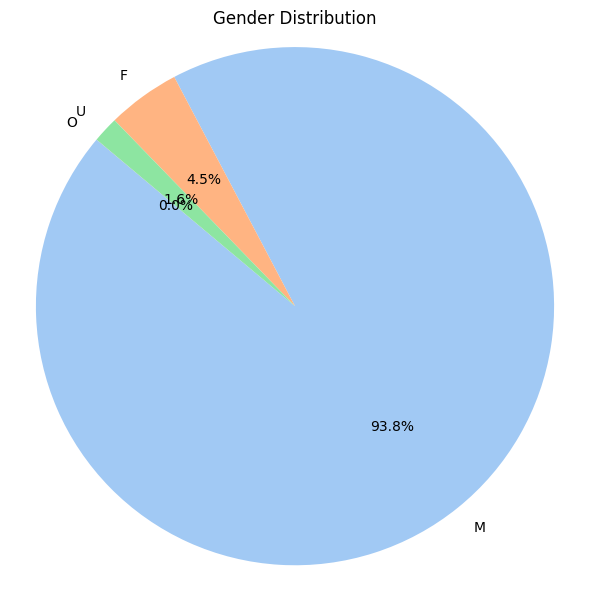

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gender_counts = df_vidhan['cand_sex'].value_counts().reset_index()
gender_counts.columns = ['Gender','Count']
print(gender_counts)

plt.figure(figsize=(6,6))
plt.pie(
    gender_counts['Count'],
    labels = gender_counts['Gender'],
    autopct = '%1.1f%%',
    startangle = 140,
    colors = sns.color_palette('pastel')
)
plt.title('Gender Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
print("unique counts")
print("unique states:", df_vidhan['st_name'].nunique())
print("years Covered:", df_vidhan['year'].nunique())
print("unique constituencies:", df_vidhan['ac_no'].nunique())
print("unique candidates:",df_vidhan['cand_name'].nunique())
print("unique parties:", df_vidhan['partyname'].nunique())


unique counts
unique states: 30
years Covered: 36
unique constituencies: 425
unique candidates: 220529
unique parties: 1663


In [ ]:
gender_counts = df_vidhan['cand_sex'].value_counts().reset_index()
gender_counts.columns = ['Gender','Count']
print(gender_counts)

  Gender   Count
0      M  307091
1      F   14883
2      U    5302
3      O      11


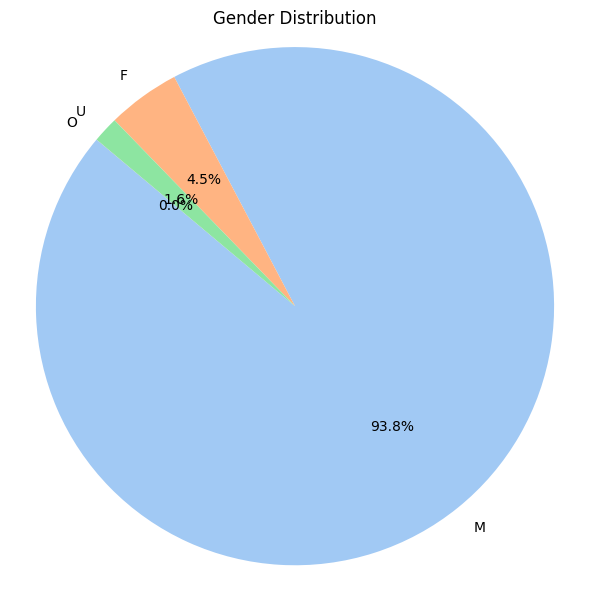

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(
    gender_counts['Count'],
    labels = gender_counts['Gender'],
    autopct = '%1.1f%%',
    startangle = 140,
    colors = sns.color_palette('pastel')
)
plt.title('Gender Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
candidate_per_seat = df_vidhan.groupby(['year','ac_no'])['cand_name'].nunique()

avg_candidates_per_seat = candidate_per_seat.groupby('year').mean().reset_index()
avg_candidates_per_seat.columns = ['Year','Avg Candidates per Seat']
print(avg_candidates_per_seat)

    Year  Avg Candidates per Seat
0   1977                36.708235
1   1978                19.384354
2   1979                12.312500
3   1980                39.305882
4   1982                11.676871
5   1983                15.200680
6   1984                 7.470085
7   1985                57.840000
8   1987                16.122449
9   1989                30.978824
10  1990                65.114198
11  1991                40.286396
12  1992                 4.931624
13  1993                41.716981
14  1994                20.061224
15  1995                53.206790
16  1996                39.681604
17  1997                 5.905983
18  1998                20.215625
19  1999                19.472789
20  2000                17.783951
21  2001                17.428571
22  2002                20.193548
23  2003                25.743478
24  2004                24.972789
25  2005                29.246914
26  2006                20.928571
27  2007                24.866005
28  2008      

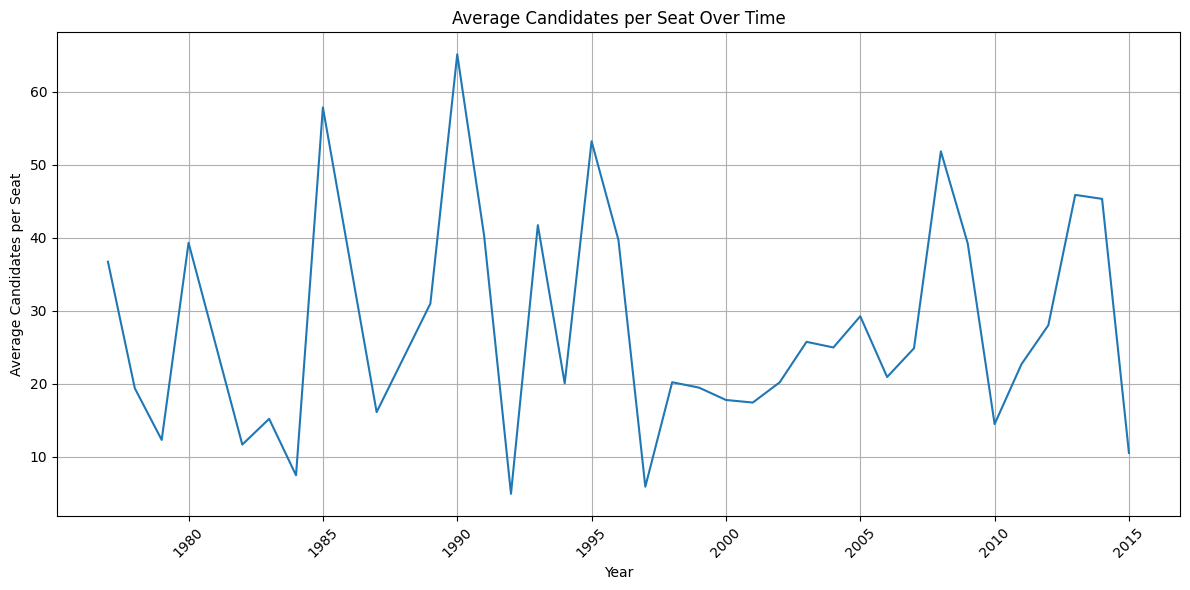

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_candidates_per_seat, x='Year', y='Avg Candidates per Seat')
plt.title('Average Candidates per Seat Over Time')
plt.xlabel('Year')
plt.ylabel('Average Candidates per Seat')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
constituency_turnout = (df_vidhan.groupby(['year','st_name','ac_no'])[['totvotpoll','electors']]
                        .agg({'totvotpoll':'max','electors' : 'max'})
                        .reset_index())

In [ ]:
yearly_turnout = (constituency_turnout.groupby('year')
                  [['totvotpoll','electors']]
                  .sum()
                  .reset_index())

In [ ]:
yearly_turnout['voter turnout_percent'] = (yearly_turnout['totvotpoll']/yearly_turnout['electors'])*100
print(yearly_turnout)

    year  totvotpoll   electors  voter turnout_percent
0   1977  59107891.0  226166275              26.134706
1   1978  27708972.0   85753182              32.312471
2   1979     94133.0     359101              26.213517
3   1980  64915667.0  258603200              25.102422
4   1982  20187665.0   52422974              38.509194
5   1983  21296499.0   66063231              32.236539
6   1984  12232502.0   31523449              38.804453
7   1985  86255868.0  312198536              27.628531
8   1987  25323833.0   63872512              39.647467
9   1989  49919785.0  186678633              26.741028
10  1990  57125442.0  213268107              26.785741
11  1991  57289242.0  203190207              28.194883
12  1992   1416408.0   13171851              10.753295
13  1993  41990796.0  167611922              25.052392
14  1994  25693484.0   75778249              33.906146
15  1995  46243622.0  164492560              28.112896
16  1996  71148520.0  237706787              29.931211
17  1997  

In [ ]:
winners_df = df_vidhan.loc[df_vidhan.groupby(['year','st_name','ac_no'])['totvotpoll'].idxmax()]

print(winners_df[winners_df['st_name'] == 'Gujarat'][['st_name','year','cand_name','partyabbre','totvotpoll']]
.sort_values(by='year',ascending=False)
.head(10))

       st_name  year                            cand_name partyabbre  \
84523  Gujarat  2012    Pansheriya Prafulbhai Chhaganbhai        BJP   
84615  Gujarat  2012         Kishorbhai Ratilal Vankawala        BJP   
84609  Gujarat  2012         Vanani Nanubhai Bhagavanbhai        BJP   
84600  Gujarat  2012            Sanghvi Harsh Rameshkumar        BJP   
84593  Gujarat  2012                   Narottambhai Patel        BJP   
84585  Gujarat  2012        Patil Sangitaben Rajendrabhai        BJP   
84565  Gujarat  2012       Kachhadiya Janakbhai Manjibhai        BJP   
84560  Gujarat  2012  Kanani Kishorbhai Shivabhai (Kumar)        BJP   
84555  Gujarat  2012         Choksi Ajaykumar Jashvantlal        BJP   
84515  Gujarat  2012          Vasava Parbhubhai Nagarbhai        INC   

       totvotpoll  
84523    126032.0  
84615     99099.0  
84609     88604.0  
84600    103577.0  
84593     74946.0  
84585     79744.0  
84565     65696.0  
84560     68529.0  
84555     59690.0  
84515  

In [ ]:
party_votes = df_vidhan.groupby('partyabbre')['totvotpoll'].sum()
total_votes = party_votes.sum()
party_vote_share = (party_votes/total_votes * 100).reset.index()

AttributeError: 'Series' object has no attribute 'reset'

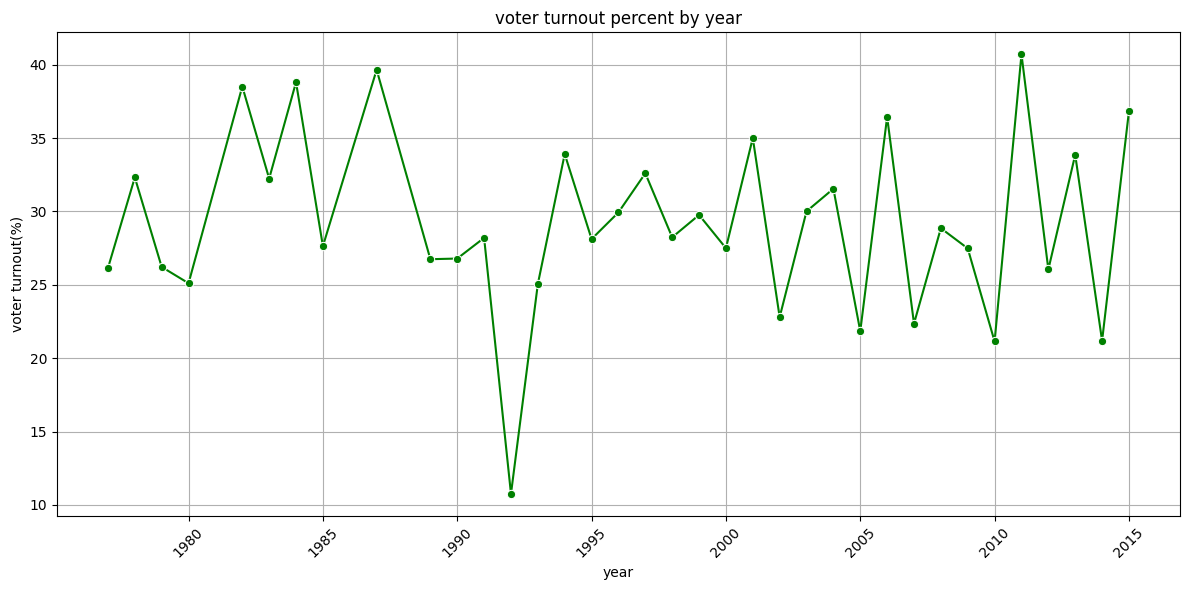

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_turnout, x= 'year',y= 'voter turnout_percent', marker = 'o',color = 'green')
plt.title('voter turnout percent by year')
plt.ylabel('voter turnout(%)')
plt.xlabel('year')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

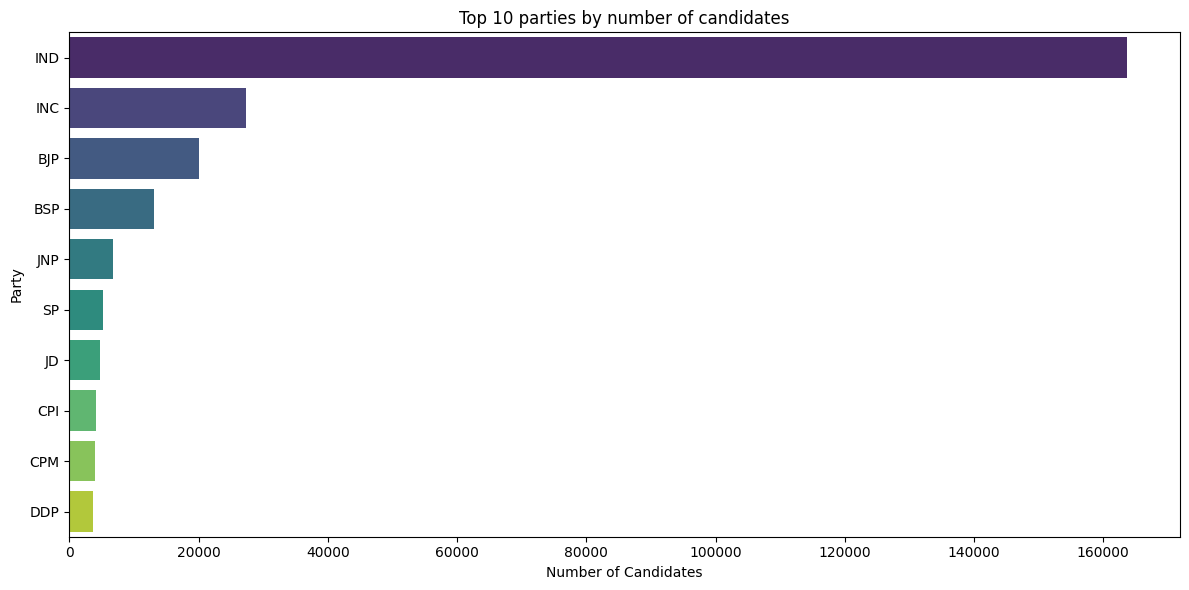

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=party_counts_top_10,
    x='candidate_count',
    y='party',
    hue='party',
    dodge=False,
    palette='viridis',
    legend=False
)
plt.title("Top 10 parties by number of candidates")
plt.xlabel("Number of Candidates")
plt.ylabel("Party")
plt.tight_layout()
plt.show()

In [ ]:
party_counts = df_vidhan['partyabbre'].value_counts().reset_index()
party_counts.columns = ['party','candidate_count']
party_counts_top_10 = party_counts.head(10)
display(party_counts_top_10)

,party,candidate_count
0,IND,163687
1,INC,27360
2,BJP,20053
3,BSP,13076
4,JNP,6779
5,SP,5137
6,JD,4723
7,CPI,4045
8,CPM,3977
9,DDP,3620


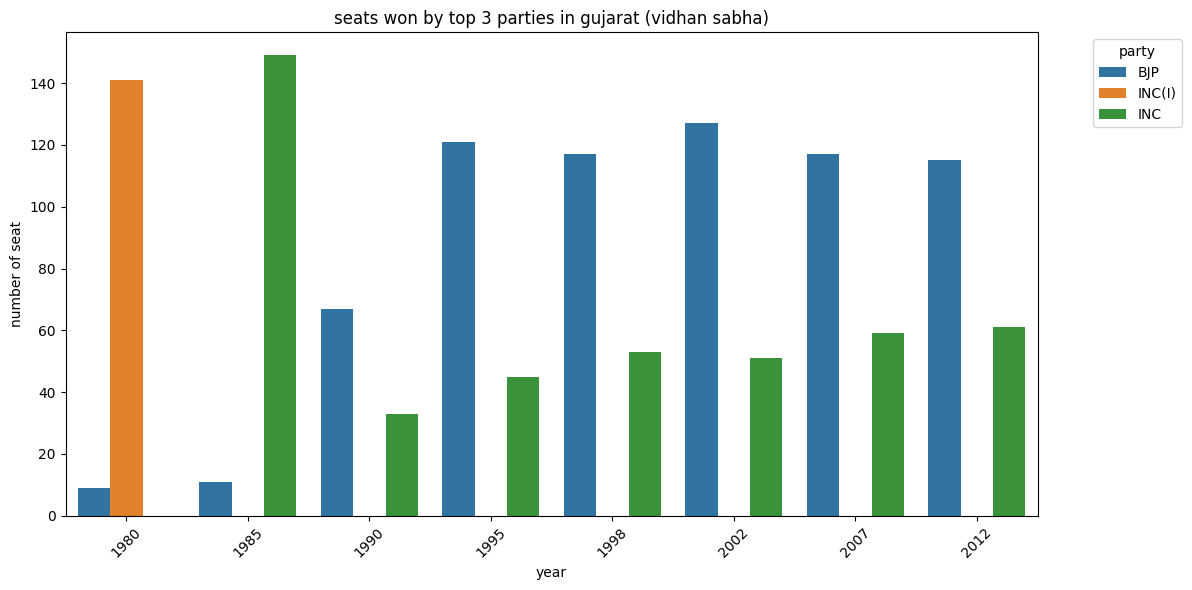

In [ ]:
# filter for gujarat
winners_gujarat = winners_df[winners_df['st_name'] == 'Gujarat'].copy()


#2. Find top 3 parties in Gujarat by total seats won
top_3_parties = winners_gujarat['partyabbre'].value_counts().nlargest(3).index.tolist()

# 3. Filter to only those top 3 parties
winners_gujarat_top3 = winners_gujarat[winners_gujarat['partyabbre'].isin(top_3_parties)]

#4. seats won per year by party
party_seats_year = (
    winners_gujarat_top3.groupby(['year','partyabbre']).size()
    .reset_index(name = 'seats')
)

#5. plot: seats won
plt.figure(figsize=(12,6))
sns.barplot(data = party_seats_year, x='year' , y='seats' , hue = 'partyabbre')
plt.title('seats won by top 3 parties in gujarat (vidhan sabha)')
plt.xlabel('year')
plt.ylabel('number of seat')
plt.xticks(rotation=45)
plt.legend(title='party' , bbox_to_anchor = (1.05 , 1),loc='upper left')
plt.tight_layout()
plt.show()
